#  1 Violation zone
For now...
Creating dataframe with values of M1-M3.

In [31]:
R1_bound = 0.8
R2_bound = 232
R3_bound = 0.075
#Light value
minM1=0.5
maxM1= 1
M =20
#Floor friction
minM2=0.25
maxM2=0.5
N=20
#Object friction
minM3=0.5
maxM3=1
L=20

In [32]:
p1 =lambda M1   : M1*0.0381941 + 0.962500
p2 = lambda M1,M3: 0.74428  + 0.07164   - (0.04329 * M1 * M3)                      # before only M3
p3 = lambda M1,M3: 0.17371  - 0.04668   + (0.03970* M1 * M3)                       # before only M1
p4 = lambda M3   : 0.80629  + (0.21175 * M3)
pR = lambda x : 0.6
T1 = lambda M1,M2: 134.171 - (11.929 * M1) - (7.999 * M2)     
T2 = lambda x :32.52
T3 = lambda M2: 53.6992 - (2.6870 * M2)                          
T1F= lambda M2: 349.772 - (10.97 * M2)                                             # fixed before
T2F= lambda x :59.16 
TR = lambda M1,M3: 52.8953 - (0.2339 *M1) + (8.5904 *M3) + (15.6654 * M1 * M3)     # before M

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Create df
file = "LookUpTables/light.xlsx"
df_light = pd.read_excel(file)
df = pd.DataFrame(columns=df_light.columns)
df = df.rename(columns={'Light value': 'M1'}) #rename
df.insert(1, 'M2', [])
df.insert(2, 'M3', [])
M1 = []; M2 = []; M3 = []
for m1, m2, m3 in [(m1,m2,m3) for m1 in np.linspace(minM1, maxM1, M) for m2 in np.linspace(minM2, maxM2, N) for m3 in np.linspace(minM3, maxM3, L)]:#create all combinations of env. values
    M1.append(m1); M2.append(m2); M3.append(m3)                
df['M1']=M1; df['M2']=M2; df['M3']=M3
df.head(1)

,M1,M2,M3,p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry
0,0.5,0.25,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def checkViolation(p1,p2,p3,p4,T1,T1F,T2,T2F,TR,T3,Pretry):
    violation = 0
    r1,r2,r3 =0,0,0
    
    # compute R1-R3
    R1= (p1*p2*p4)/(1-Pretry*p3)
    R2= (p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)
    R3 = (p1*p2*(1-p4))/(1-Pretry*p3)
    # check violation   (i.e., does not comply with innequalities, hence innequality symbols are flipped)
    if R1 <= R1_bound:
        violation = 1; r1=1
    if R2 >= R2_bound:
        violation = 1; r2=1
    if R3 >= R3_bound:
        violation = 1; r3=1
    return [R1,R2,R3,r1,r2,r3,violation]

In [36]:
def addViolationsDF(df):
    for index,row in df.iterrows():
        M1 = row['M1']; M2= row['M2']; M3 = row['M3']
        x = row['M3'] #dummy
        #check violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(p1(M1),p2(M1,M3),p3(M1,M3),p4(M3),T1(M1,M2),
                                                       T1F(M2),T2(x),T2F(x),TR(M1,M3),T3(M2),pR(x))
        df.loc[index,'p1'],df.loc[index,'p2'], df.loc[index,'p3'],df.loc[index,'p4'], df.loc[index,'T1'],df.loc[index,'T1F'],df.loc[index,'T2'],df.loc[index,'T2F'],df.loc[index,'TR'],df.loc[index,'T3'], df.loc[index,'Pretry']=p1(M1),p2(M1,M3),p3(M1,M3),p4(M3),T1(M1,M2), T1F(M2),T2(x),T2F(x),TR(M1,M3),T3(M2),pR(x)
        df.loc[index,'R1'],df.loc[index,'R2'],df.loc[index,'R3'] = R1,R2,R3
        df.loc[index,'r1'],df.loc[index,'r2'],df.loc[index,'r3'] = r1,r2,r3
        df.loc[index,'violation'] = violation
    
    df.to_excel('_LookUpTableViolation.xlsx', index=False)
    df.head(20)
    return df

df = addViolationsDF(df)
df.head(5)

,M1,M2,M3,p1,p2,p3,p4,T1,T1F,T2,...,TR,T3,Pretry,R1,R2,R3,r1,r2,r3,violation
0,0.5,0.25,0.500000,0.981597,0.805098,0.136955,0.912165,126.20675,347.0295,32.52,...,60.9899,53.02745,0.6,0.785406,231.061762,0.075629,1.0,0.0,1.0,1.0
1,0.5,0.25,0.526316,0.981597,0.804528,0.137477,0.917737,126.20675,347.0295,32.52,...,61.422087,53.02745,0.6,0.789915,231.179674,0.070805,1.0,0.0,0.0,1.0
2,0.5,0.25,0.552632,0.981597,0.803958,0.138,0.92331,126.20675,347.0295,32.52,...,61.854274,53.02745,0.6,0.794420,231.297957,0.065985,1.0,0.0,0.0,1.0
3,0.5,0.25,0.578947,0.981597,0.803389,0.138522,0.928882,126.20675,347.0295,32.52,...,62.286461,53.02745,0.6,0.798921,231.416611,0.061168,1.0,0.0,0.0,1.0
4,0.5,0.25,0.605263,0.981597,0.802819,0.139044,0.934454,126.20675,347.0295,32.52,...,62.718647,53.02745,0.6,0.803419,231.535636,0.056354,0.0,0.0,0.0,0.0


### Results:

In [37]:
# Sum the values in the 'Age' column
total_violation = df['violation'].sum()
total = len(df['violation'])

print(" Total data points: {}.\n Total data points in violation: {}.\n Percentage in violation: {}."
      .format(total,total_violation,total_violation/total*100))

 Total data points: 8000.
 Total data points in violation: 1252.0.
 Percentage in violation: 15.65.


### Plot violation zone

In [38]:
import plotly.graph_objects as go
import plotly.express as px

#a) set ranges (e.g., light cannot be >1 or <0)
light_range_values = [minM1,maxM1] #min,max
floor_range_values = [minM2,maxM2] #min,max
object_range_values = [minM3,maxM3] #min,max

# Plot the scatter plot
fig = px.scatter_3d(df, x='M1', y='M2', z='M3', color=df['violation'])
fig.update_layout(title_text='Violation (1) and safe (0) zone')
fig.update_scenes(xaxis_range=light_range_values,
                  yaxis_range=floor_range_values,
                  zaxis_range=object_range_values)
fig.show()

In [39]:
# Exclude rows where 'time2violation' is -1
dfV = df.copy()
dfV = dfV[dfV['violation'] == 1]

# Plot the scatter plot
fig = px.scatter_3d(dfV, x='M1', y='M2', z='M3', color_discrete_sequence=['yellow'])
fig.update_layout(title_text='Violation zone')
fig.update_scenes(xaxis_range=light_range_values,
                  yaxis_range=floor_range_values,
                  zaxis_range=object_range_values)
fig.show()

# 2 Get time to boundary

### Creating ***synthetic data for a robot's 100 days of work***

**a) Select a Configuration**

incr_time  = increment in time

incr_light = increment in light...

In [40]:
#a) set step increments of time    (e.g., 0.05 of a day ~ 72 minutes)
_step = {'light':0.05, 'floor':0.05, 'obj':0.05}

#b) set trends
specs = {'incr_time': 1,      # time increment
                  'incr_light': -0.01, # Light changing -0.001/1 sec (trend)
                  'incr_floor':  0.00, # Friction floor changing 0.00/1 sec. Trend:
                  'incr_obj':   -0.001, # Friction object changing 0.00/1 sec. Trend:
                  'timeWindow' : 100   # Time window for checking violation
                 }
#Note: initial conditions are added when getting the time to boundary

print("Speed: {}/{}  light/time; ".format(specs['incr_light'],specs['incr_time']) )
print("Speed: {}/{}  floorFriction/time; ".format(specs['incr_floor'],specs['incr_time']) )
print("Speed: {}/{}  objectFriction/time; ".format(specs['incr_obj'],specs['incr_time']) )

Speed: -0.01/1  light/time; 
Speed: 0.0/1  floorFriction/time; 
Speed: -0.001/1  objectFriction/time; 


In [41]:
# c) noise
mean_M123 = [0,0,0]
std_dev_M123 = [0.0,0.0,0.0] #[0.01,0.02,0.01]    #std_dev_M123 = [0.01,0.02,0.01]

np.random.seed(42) # seed distribution for reproducibility

**b) Continue runnning the code here**

In [42]:
#create environmental data from init environmental values, trends and time window

def bound(M1,M2,M3):
    #check for ranges
    if M1>light_range_values[1]: M1=light_range_values[1]
    elif M1<light_range_values[0]: M1=light_range_values[0]
    if M2>floor_range_values[1]: M2=floor_range_values[1]
    elif M2<floor_range_values[0]: M2=floor_range_values[0]
    if M3>object_range_values[1]: M3=object_range_values[1]
    elif M3<object_range_values[0]: M3=object_range_values[0]
    return M1,M2,M3

def createEnvTimeWindow(specs):
    # a) initial time and time vector
    t0 = 0; time  = np.arange(t0, t0 + specs['timeWindow'] * specs['incr_time'], specs['incr_time'])
    # b) env. data in time window
    light,floor,obj = np.empty(specs['timeWindow']),np.empty(specs['timeWindow']),np.empty(specs['timeWindow'])
    #b.1 state at time t0
    light[0]=specs['initLight']; floor[0]=specs['initFloor']; obj[0]=specs['initObj']
    #b.2 save initial state to not modify in the next loop
    t1=t0; light_t1 = specs['initLight']; floor_t1 = specs['initFloor']; obj_t1 = specs['initObj']
    # c) create env. data
    for i in range(1,specs['timeWindow']):
        #next state at time t+1
        t2 = t1 + specs['incr_time']
        light_t2 = light_t1 + specs['incr_light']
        floor_t2 = floor_t1 + specs['incr_floor']
        obj_t2 = obj_t1 + specs['incr_obj']
        # light linear model
        m = ((light_t2)-(light_t1))/((t2)-(t1)); b = light_t2 - m*t2
        l = m*t2 + b + np.random.normal(mean_M123[0], std_dev_M123[0], 1) #noise     (Note: light[i] = light_t2+noise; but light_t2 without noise is safe for the next iteration)
        # floor linear model
        m = ((floor_t2)-(floor_t1))/((t2)-(t1)); b = floor_t2 - m*t2
        f = m*t2 + b + np.random.normal(mean_M123[1], std_dev_M123[1], 1) #noise
        # obj linear model
        m = ((obj_t2)-(obj_t1))/((t2)-(t1)); b = obj_t2 - m*t2
        o = m*t2 + b + np.random.normal(mean_M123[2], std_dev_M123[2], 1) #noise
        
        #bound values
        light[i],floor[i],obj[i] = bound(l,f,o)
        
        #update current state t=t+1
        t1=t2; light_t1 = light_t2; floor_t1 = floor_t2; obj_t1 = obj_t2

    dfHist = pd.DataFrame(data = {'Time':time,'Light value':light,'Floor friction':floor,'Object friction':obj})
    return dfHist

# e.g.: Dataframe:
#Time	Light value	 Floor friction	Object friction
# 98	98	0.01507	 0.238213	    0.658496
# 99	99	0.01357	 0.236142	    0.658996

#e.g. for an initial config of M1-M3

specs['initLight']=1; specs['initFloor']=0.25; specs['initObj']=0.65
dfHist = createEnvTimeWindow(specs)
dfHist

,Time,Light value,Floor friction,Object friction
0,0,1.00,0.25,0.650
1,1,0.99,0.25,0.649
2,2,0.98,0.25,0.648
3,3,0.97,0.25,0.647
4,4,0.96,0.25,0.646
...,...,...,...,...
95,95,0.50,0.25,0.555
96,96,0.50,0.25,0.554
97,97,0.50,0.25,0.553
98,98,0.50,0.25,0.552


In [43]:
def createEnvTimeWindow(excelFile):
    dfHist = pd.read_csv(excelFile)
    #dfHist = pd.DataFrame(data = {'Time':time,'Light value':light,'Floor friction':floor,'Object friction':obj})
    dfHist = dfHist.rename(columns={'Light': 'Light value'})
    return dfHist

dfHist = createEnvTimeWindow('day-2.csv')
dfHist

,Time,Light value,Floor friction,Object friction,State
0,0,0.949708,0.459904,0.962173,0
1,5,0.949708,0.459904,0.962173,0
2,10,0.949708,0.459904,0.962173,0
3,15,0.949708,0.459904,0.962173,0
4,20,0.949708,0.459904,0.962173,0
...,...,...,...,...,...
1543,7175,0.954141,0.448154,0.920191,0
1544,7180,0.954141,0.448154,0.920191,0
1545,7185,0.954141,0.448154,0.920191,0
1546,7190,0.954141,0.448154,0.920191,0


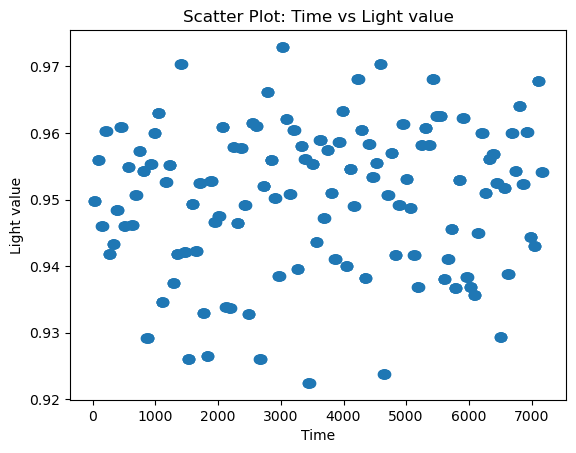

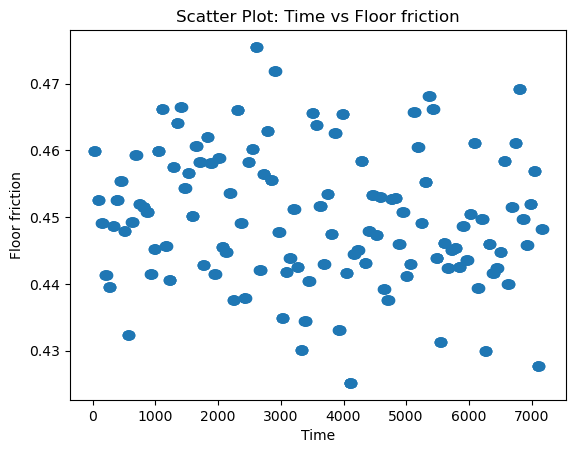

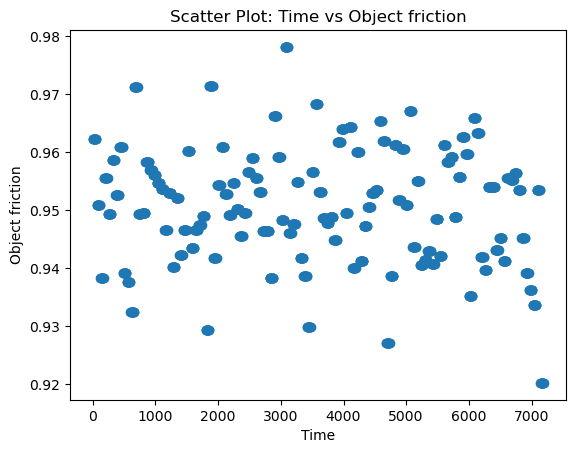

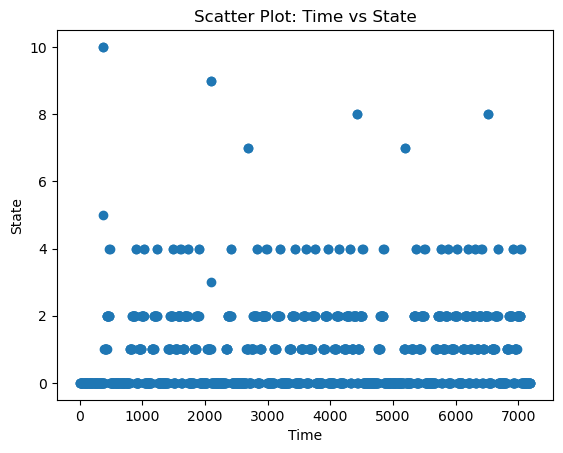

In [44]:
columns = dfHist.columns
for i in range( 1, len(columns)):
    x_time = dfHist['Time']
    # Scatter plot time vs environmental values
    plt.scatter(x_time, dfHist[columns[i]])
    # Add labels and title
    plt.xlabel(columns[0])
    plt.ylabel(columns[i])
    plt.title(f'Scatter Plot: {columns[0]} vs {columns[i]}')
    # Show the plot
    plt.show()

In [45]:
# Get system parameters from environmental values
def getSystemParameters(env):
    M1 = env['M1']; M2 = env['M2']; M3 = env['M3']
    x = env['M3'] #dummy
    
    k=['p1','p2','p3','p4','T1','T1F','T2','T2F','TR','T3','Pretry']  
    v=[p1(M1),p2(M1,M3),p3(M1,M3),p4(M3),T1(M1,M2),T1F(M2),T2(x),T2F(x),TR(M1,M3),T3(M2),pR(x)]
    return dict(zip(k,v))    #{'p1':p1, 'p2':p2,'p3':p3,'p4':p4, 'T1':T1, 'T1F':T1F, 'T2':T2, 'T2F':T2F, 'TR':TR, 'T3':T3, 'Pretry':Pretry}
        
getSystemParameters({'M1':0.71 , 'M2':0.7, 'M3':0.55})

{'p1': 0.989617811,
 'p2': 0.799015255,
 'p3': 0.14253285000000002,
 'p4': 0.9227525,
 'T1': 120.10211,
 'T1F': 342.093,
 'T2': 32.52,
 'T2F': 59.16,
 'TR': 63.571289699999994,
 'T3': 51.8183,
 'Pretry': 0.6}

In [46]:
#Function from before:
def getTimeToViolation(dfHist):
    #get time to violation for requirements ri
    # -1 if no violation occurs in time window
    time_violation={"r1":-1,"r2":-1,"r3":-1}
    # for time i
    for index,row in dfHist.iterrows(): #each row in dfHist is a new time step
        time = row['Time']
        # get system parameters
        systemParameterValues = getSystemParameters({'M1':row['Light value'] , 'M2':row['Floor friction'], 'M3':row['Object friction']})
        # get violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
        # check if r1 first time in violation - r1
        if r1==1 and time_violation['r1']==-1:
            time_violation["r1"]=time #save time
        # check if r2 first time in violation - r2
        if r2==1 and time_violation['r2']==-1:
            #save time
            time_violation["r2"]=time #save time
        # check if r3 first time in violation - r3
        if r3==1 and time_violation['r3']==-1:
            time_violation["r3"]=time #save time
        # if all violation times saved
        if time_violation['r1']!=-1 and time_violation['r2']!=-1 and time_violation['r3']!=-1:
            return time_violation
    return time_violation #e.g. {"r1":-1,"r2":-1,"r3":-1} if none in violation, otherwise time to violation

getTimeToViolation(dfHist)

{'r1': -1, 'r2': -1, 'r3': -1}

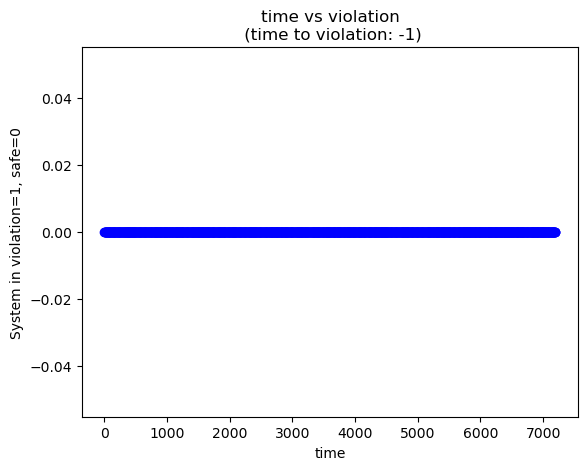

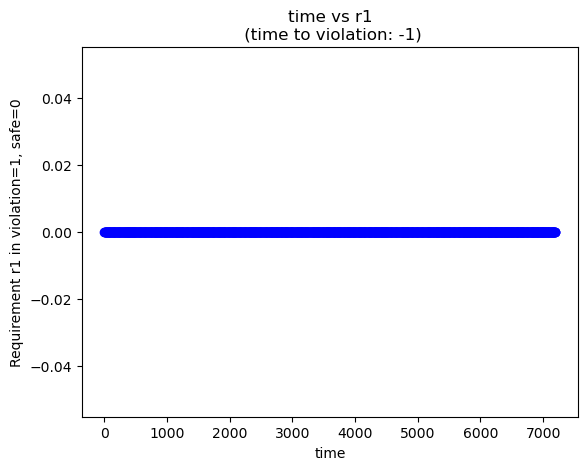

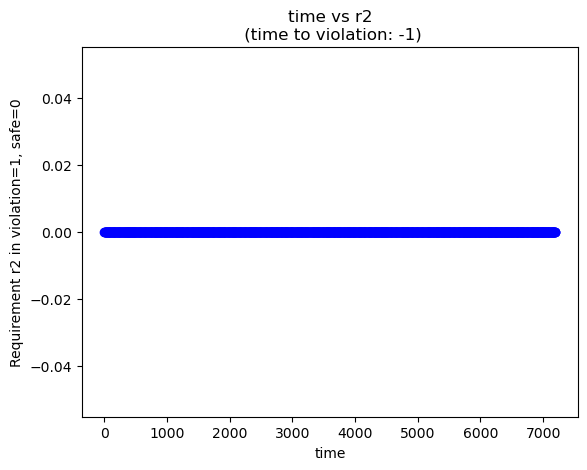

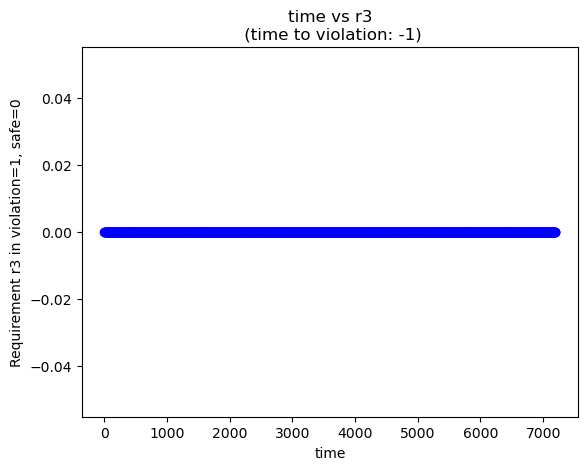

In [47]:
#Plot time vs violation

#Select variables in violation to plot:
_violation_vars = ["violation","r1","r2","r3"] # <--- in violation and requirements (0=safe, 1=in violation) 


for _vars in _violation_vars:
    #time to violation
    t_v=-1
    for index,row in dfHist.iterrows():
        x_timeValue = row['Time']
        # get system parameters
        systemParameterValues = getSystemParameters({'M1':row['Light value'] , 'M2':row['Floor friction'], 'M3':row['Object friction']})
        # get violation
        [R1,R2,R3,r1,r2,r3,violation] = checkViolation(*list(systemParameterValues.values()))
        exec("y = {}".format(_vars)) # y axis is variable plot
        #check if in violation
        exec("in_violation = {}==1".format(_vars))
        if in_violation and t_v==-1:
            #save time
            t_v = x_timeValue
        #plot
        plt.plot(x_timeValue,y, 'bo')
        
    if _vars=="violation":
        plt.xlabel("time")
        plt.ylabel("System in violation=1, safe=0")
    else:
        plt.xlabel("time")
        plt.ylabel("Requirement " + _vars + " in violation=1, safe=0")
    plt.title("time vs "+_vars+"\n (time to violation: "+str(t_v)+")")
    
    plt.show()

In [48]:
# 1) Create a new DataFrame  <-- Violation information dataframe

def time2violation(specs):
    column_names = ["Init Light value","Init Floor friction", "Init Object friction", #<-- initial env. values
                    "r1Time2violation","r2Time2violation","r3Time2violation", #<--  -1 if not reaches violation; 0 if in violation already; >0 time to violation
                    "Init in violation", #<-- 0 not in violation; 1 in violation from beggining
                    "time2violation"]    #<-- min. time to violation

    df_HeatMap = pd.DataFrame(columns=column_names) #[Init Light value, Init Floor friction, Init Object friction, r1Time2violation, r2Time2violation, r3Time2violation, Init in violation, time2violation]


    # 2) create all combinations of environmental initial values   
    _rows = []
    
    for M1t0, M2t0, M3t0 in [(M1t0, M2t0, M3t0) for M1t0 in np.linspace(minM1, maxM1, M) for M2t0 in np.linspace(minM2, maxM2, N) for M3t0 in np.linspace(minM3, maxM3, L)]:#create all combinations of initial values
        # add initial values to 'specifications'
        specs['initLight']=M1t0; specs['initFloor']=M2t0; specs['initObj']=M3t0

        # compute time to violations
        dfHist = createEnvTimeWindow(specs)
        time_violation = getTimeToViolation( dfHist ) #time_violation={"r1":-1,"r2":-1,"r3":-1} if none in violation, otherwise time to violation

        #check min time to violation
        if time_violation['r1']+time_violation['r2']+time_violation['r3']!=-3: #at least one in violation
            t = [x for x in [time_violation['r1'],time_violation['r2'],time_violation['r3']] if x != -1] #remove -1s          
            min_time_violation = min(t)
        else: min_time_violation = -1

        #check if initially in violation zone
        if time_violation['r1']==0 or time_violation['r2']==0 or time_violation['r3']==0: #at least one violated at time 0
            initially_in_violation=1
        else:
            initially_in_violation=0


        #add results
        _rows.append({
            #env
            'Init Light value':M1t0,
            'Init Floor friction':M2t0,
            'Init Object friction':M3t0,
            "r1Time2violation": time_violation['r1'],
            "r2Time2violation": time_violation['r2'],
            "r3Time2violation": time_violation['r3'],
            "Init in violation": initially_in_violation,
            "time2violation": min_time_violation
        })


    df_HeatMap = pd.concat([df_HeatMap, pd.DataFrame(_rows)], ignore_index=True)
    df_HeatMap.to_excel('_ViolationTable.xlsx', index=False)
    return df_HeatMap

df_HeatMap = time2violation(specs)
num_rows, num_columns = df_HeatMap.shape

# Print the size
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

ValueError: Invalid file path or buffer object type: <class 'dict'>

# Plots

In [ ]:
# Exclude rows where 'time2violation' is -1 = not enter violation in time window
dfc = df_HeatMap.copy()
dfc = dfc[dfc['time2violation'] != 0]
dfc = dfc[dfc['time2violation'] != -1]
fig = px.scatter_3d(dfc, x='Init Light value', y='Init Floor friction', z='Init Object friction', color='time2violation')
fig.update_layout(title_text='Time to violation')

# Second scatter plot
dfc = df_HeatMap.copy()
dfc = dfc[dfc['time2violation'] == -1]
ss = px.scatter_3d(dfc, x='Init Light value', y='Init Floor friction', z='Init Object friction', color_discrete_sequence=['green'])
fig.add_trace(ss.data[0])

fig.update_layout(title_text='Time to violation (green=not at risk of violation in time window)')
fig.show()

# -- Safe/violation by solving inequality functions --

Using the functions fitted by Julie and the trends of the measurements, we can solve directly for time (t) as follows.

(I need to check how to read this info so we can use it to check time to violation rather than Newtonian approach)

In [49]:
R1_bound = 0.8
R2_bound = 232
R3_bound = 0.075
val = (0.5, 1.0,   20, 0.25,   0.5, 20, 0.5,   1.0,  20, R1_bound, R2_bound, R3_bound)
minM1, maxM1, M, minM2, maxM2, N, minM3, maxM3, L, probSuccMin, tMax, pFailMax = val


In [50]:
import sympy as sp

# Define symbols
t = sp.symbols('t', real=True, positive=True)

# Trends
M1 = 0.8 - t
M2= 0.3 + t
M3 = 0.4 + t

# Given expressions for p1, p2, p3...
p1 = M1 * 0.0381941 + 0.962500
p2 = 0.74428 + 0.07164 - (0.04329 * M1 * M3)
p3 = 0.17371 - 0.04668 + (0.03970 * M1 * M3)
p4 = 0.80629 + (0.21175 * M3)
pR = 0.6; Pretry=0.6
T1 = 134.171 - (11.929 * M1) - (7.999 * M2)     
T2 = 32.52
T3 = 53.6992 - (2.6870 * M2)                          
T1F= 349.772 - (10.97 * M2)
T2F= 59.16 
TR = 52.8953 - (0.2339 *M1) + (8.5904 *M3) + (15.6654 * M1 * M3)

#-- Inequality expression
R1f = ((p1 * p2 * p4) / (0.4 * p3)) > R1_bound
solution1 = sp.solve(R1f, domain=sp.S.Reals) # Solve the inequality
print("Solution R1 for t:", solution1)

#-- Inequality expression
R2f = ((p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)) < R2_bound
solution2 = sp.solve(R2f, domain=sp.S.Reals)
print("Solution R2 for t:", solution2)

#-- Inequality expression
R3f = ((p1*p2*(1-p4))/(1-Pretry*p3)) < R3_bound
solution3 = sp.solve(R3f, domain=sp.S.Reals)
print("Solution R3 for t:", solution3)

Solution R1 for t: (27.12398725463 < t) | (t < 2.08672947473432)
Solution R2 for t: (25.5206274580449 < t) | (t < 4.62793265793261)
Solution R3 for t: (0.10538771140679 < t) & (t < 26.2045524249208)


In [51]:
# Inequality expressions
part2 = ((p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)) < R2_bound
part3 = ((p1*p2*(1-p4))/(1-Pretry*p3)) < R3_bound

# Solve the inequalities
solution_part3 = sp.solve_univariate_inequality(part3, t, relational=False, domain=sp.S.Reals)
solution_part2 = sp.solve_univariate_inequality(part2, t, relational=False, domain=sp.S.Reals)

print(solution_part2)
print(solution_part3)


combined_solution = sp.Union(solution_part3, solution_part2)

print("Combined solution:", combined_solution)

#Not sure why 2 goes to -4.42413034609721. It may be only that it does not consider t>0

Union(Interval.open(-4.42413034609721, 4.62793265793261), Interval.open(25.5206274580449, oo))
Interval.open(0.105387711406790, 26.2045524249208)
Combined solution: Interval.open(-4.42413034609721, oo)


#### Only compute time to violation for Safe Zone. In violation will not return result
#### but --ERROR--

In [52]:
# -- THIS DOES NOT COMPUTE as there is no answer to solving part1 --- (i.e., in violation)
# Inequality expressions
part1 = ((p1 * p2 * p4) / (0.4 * p3)) > R1_bound
part2 = ((p1*(p3*T2-p2*T3-p3*T2F-T1-T2+T1F)+Pretry*p3*(T1F-p1*TR-p1*T1F)-T1F) / (Pretry*p3-1)) < R2_bound


# Solve the inequalities
solution_part1 = sp.solve_univariate_inequality(part1, t, relational=False, domain=sp.S.Reals)
solution_part2 = sp.solve_univariate_inequality(part2, t, relational=False, domain=sp.S.Reals)

print(solution_part1)
print(solution_part2)


combined_solution = sp.Union(solution_part1, solution_part2)

print("Combined solution:", combined_solution)

KeyboardInterrupt: 